# Chapter 16: Difficulties of Unconfoundedness in Observational Studies for Causal Effects

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf

# viz
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

font = {"family": "IBM Plex Sans Condensed", "weight": "normal", "size": 10}
plt.rc("font", **font)
plt.rcParams["figure.figsize"] = (10, 10)
%matplotlib inline

from utils import *

np.random.seed(42)
%load_ext autoreload
%autoreload 1

%load_ext watermark
%watermark --iversions

statsmodels      : 0.14.0
matplotlib       : 3.7.2
matplotlib_inline: 0.1.6
pandas           : 2.0.3
scipy            : 1.11.1
graphviz         : 0.20.1
seaborn          : 0.13.0
numpy            : 1.24.3



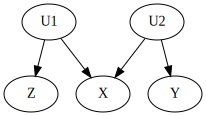

In [6]:
n = int(1e6)
df, g = simulate(
    U1=lambda: np.random.normal(size=n),
    U2=lambda: np.random.normal(size=n),
    X=lambda U1, U2: U1 + U2 + np.random.normal(size=n),
    Z=lambda U1: U1 + np.random.normal(size=n),
    Y=lambda U2: U2 + np.random.normal(size=n),
)

g

## M-bias

### continuous treatment


In [7]:
smf.ols("Y ~ Z", df).fit().params[1], smf.ols("Y ~ Z + X", df).fit().params[1]

(-0.001059798786058583, -0.2015649599959533)

### binary treatment

In [8]:
df["Z"] = df.Z >= 0
smf.ols("Y ~ Z", df).fit().params[1], smf.ols("Y ~ Z + X", df).fit().params[1]

(-0.004716077541692795, -0.4266090594224337)

## Z-bias

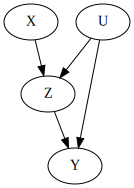

In [10]:
n = int(1e6)
df, g = simulate(
    U=lambda: np.random.normal(size=n),
    X=lambda: np.random.normal(size=n),
    Z=lambda X, U: X + U + np.random.normal(size=n),
    Y=lambda U, Z: U + 0 * Z + np.random.normal(size=n),
)

g

In [11]:
smf.ols("Y ~ Z", df).fit().params[1], smf.ols("Y ~ Z + X", df).fit().params[1]

(0.33341855312767654, 0.4988915761705824)

Adjusted comparison is more biased.

### stronger association

In [12]:
df["Z"] = 2 * df.X + df.U + np.random.normal(size=n)
smf.ols("Y ~ Z", df).fit().params[1], smf.ols("Y ~ Z + X", df).fit().params[1]

(0.16746435721059474, 0.5002889704196456)

In [13]:
df["Z"] = 10 * df.X + df.U + np.random.normal(size=n)
smf.ols("Y ~ Z", df).fit().params[1], smf.ols("Y ~ Z + X", df).fit().params[1]

(0.009893805887967858, 0.4996217558685875)